In [152]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import stats as st
import statistics as stat
image_data = nib.load('../images/T1.nii.gz').get_fdata()

(array([1.73711e+05, 1.27644e+05, 1.11675e+05, 1.00912e+05, 9.42730e+04,
        9.19570e+04, 9.16990e+04, 9.36060e+04, 9.76300e+04, 1.04650e+05,
        1.14298e+05, 1.27742e+05, 1.45738e+05, 1.73148e+05, 1.98651e+05,
        2.15048e+05, 2.14278e+05, 1.95997e+05, 1.71507e+05, 1.46342e+05,
        1.26525e+05, 1.10747e+05, 9.96620e+04, 9.33850e+04, 9.43980e+04,
        1.08815e+05, 1.29427e+05, 1.15434e+05, 7.34950e+04, 4.40380e+04,
        2.98740e+04, 2.35160e+04, 1.95630e+04, 1.69190e+04, 1.40380e+04,
        1.16910e+04, 9.76600e+03, 8.30000e+03, 6.81600e+03, 5.68200e+03,
        4.65400e+03, 3.95700e+03, 3.18600e+03, 2.72000e+03, 2.28100e+03,
        1.78400e+03, 1.55300e+03, 1.33400e+03, 1.09600e+03, 9.52000e+02,
        7.59000e+02, 6.96000e+02, 5.67000e+02, 5.03000e+02, 4.96000e+02,
        4.08000e+02, 3.59000e+02, 3.27000e+02, 2.63000e+02, 2.80000e+02,
        2.46000e+02, 2.37000e+02, 2.57000e+02, 2.51000e+02, 2.04000e+02,
        2.07000e+02, 2.05000e+02, 1.72000e+02, 1.61

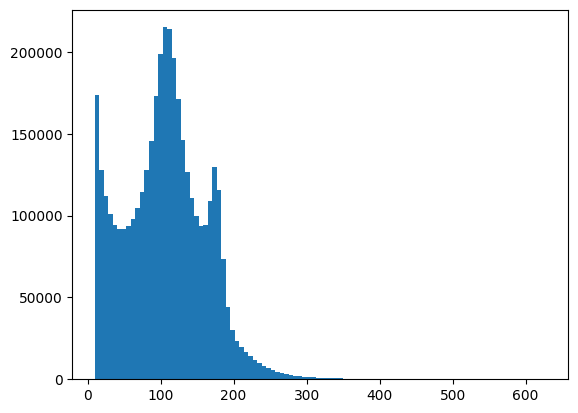

In [153]:
plt.hist(image_data[image_data>10].flatten(), 100)

In [154]:
def divide_histogram(image):
    # 1. Calcular el histograma de la imagen
    histogram = np.histogram(image, bins=256, range=(0, 255))[0]

    # 2. Dividir el histograma en tres secciones
    section_size = len(histogram) // 3
    section3 = histogram[2 * section_size:]

    peak3 = np.argmax(section3)
    ws = peak3 + 2 * section_size

    image_data_rescaled = (image / ws)

    # # 4. Visualizar el histograma con el último pico escogido
    # plt.hist(image[image>10].flatten(), 100)
    # plt.axvline(peak3 + 2 * section_size, color='red', linestyle='--', label='Último Pico')
    # plt.show()

    return image_data_rescaled


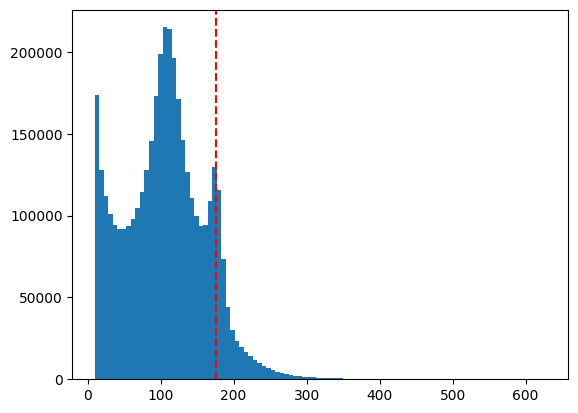

In [155]:
image_data_rescaled = divide_histogram(image_data)

(array([6.04571e+05, 2.04883e+05, 1.38885e+05, 1.16472e+05, 1.04891e+05,
        9.68400e+04, 9.35200e+04, 9.28770e+04, 9.40810e+04, 9.79330e+04,
        1.04672e+05, 1.13543e+05, 1.26751e+05, 1.44714e+05, 1.71338e+05,
        1.97983e+05, 2.16815e+05, 2.18211e+05, 2.00712e+05, 1.75573e+05,
        1.49870e+05, 1.29010e+05, 1.12728e+05, 1.01174e+05, 9.46610e+04,
        9.56880e+04, 1.10797e+05, 1.31325e+05, 1.15318e+05, 7.20950e+04,
        4.31890e+04, 2.95600e+04, 2.33060e+04, 1.95230e+04, 1.66530e+04,
        1.39610e+04, 1.15320e+04, 9.64100e+03, 8.18400e+03, 6.60700e+03,
        5.49000e+03, 4.52700e+03, 3.88100e+03, 3.09000e+03, 2.63700e+03,
        2.17000e+03, 1.73400e+03, 1.53800e+03, 1.23800e+03, 1.07100e+03,
        8.83000e+02, 7.57000e+02, 6.29000e+02, 5.42000e+02, 4.91000e+02,
        4.78000e+02, 3.83000e+02, 3.61000e+02, 3.09000e+02, 2.73000e+02,
        2.69000e+02, 2.34000e+02, 2.49000e+02, 2.62000e+02, 2.47000e+02,
        1.87000e+02, 2.23000e+02, 1.82000e+02, 1.63

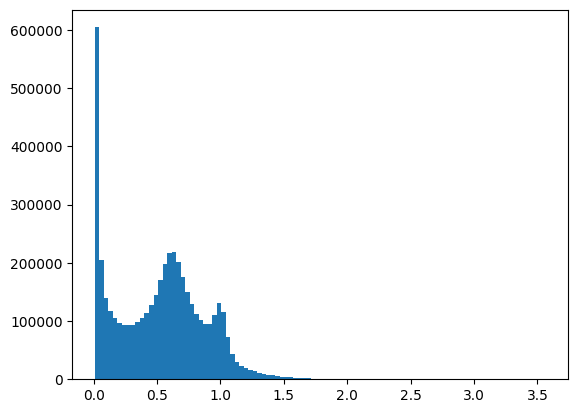

In [156]:
plt.hist(image_data_rescaled[image_data_rescaled>0.01].flatten(),100)